# Project : Insurance Claims Fraud Detection - Supervised ML


## Business Scenario: 

<font color= Dark Green> An insurance company aims to reduce financial losses due to fraudulent claims by implementing an advanced fraud detection system. The company has a dataset containing historical insurance claims and wants to build a machine learning model to predict and identify potentially fraudulent claims, thereby saving costs and improving the integrity of the insurance process. </font>


### Project/Colab Overview
>  Import Libraries </br>
>  Insights from our Dataset </br>
>  Analysis on unique values in each column </br>
>  Dealing with missing values and outliers </br>
>  Feature engineering </br>
>  categorical and numerical columns </br>
>  Train and Test split </br>

### Supervised ML Models are used to compare:
> Support Vector classifier </br>
> Decision Tree classifier </br>
> Random Forest classifier </br>
> Adaboost classifier </br>
> Gradient boosting </br>
> Stochastic Gradient Boosting </br>
> Extra Trees Classifier </br>
> VotingClassifier </br>

### Import Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [174]:
#Improt the dataset and first look of the dataset

data = pd.read_csv('Insurance_claims_Fradulent_detection.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [176]:
data.shape

(1000, 40)

In [177]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### Exploratory Data analysis

In [178]:
##Checking null values

(data.isnull().sum()/data.shape[0])*100

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                   0.0
incident_severity                0.0
authorities_contacted            9.1
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

In [179]:
#Dropping columns with above 60% missing values
data.drop(columns = '_c39', axis = 1, inplace= True)

In [180]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [181]:
# Replacing values with '?' with nan values
data.replace('?', np.nan, inplace = True)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [182]:
data[data['authorities_contacted'].isnull()]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
13,121,34,626808,2012-10-26,OH,100/300,1000,936.61,0,464652,FEMALE,MD,armed-forces,bungie-jumping,wife,52800,-32800,2015-01-08,Parked Car,NaN,Minor Damage,NaN,SC,Springfield,6582 Elm Lane,5,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
27,202,34,608513,2002-07-18,IN,100/300,500,848.07,3000000,607730,MALE,JD,exec-managerial,chess,not-in-family,31000,-30200,2015-01-07,Vehicle Theft,NaN,Minor Damage,NaN,VA,Northbrook,3790 Andromedia Hwy,5,1,YES,2,1,NaN,5720,1040,520,4160,Suburu,Forrestor,2003,Y
37,289,49,933293,1993-02-03,IL,500/1000,2000,1222.48,0,620757,FEMALE,JD,priv-house-serv,golf,unmarried,0,0,2015-01-18,Parked Car,NaN,Minor Damage,NaN,WV,Arlington,6676 Tree Lane,16,1,NO,1,1,YES,5330,1230,820,3280,Suburu,Legacy,2001,N
51,91,27,537546,1994-08-20,IL,100/300,2000,1073.83,0,609930,FEMALE,JD,farming-fishing,polo,husband,0,0,2015-01-17,Vehicle Theft,NaN,Trivial Damage,NaN,NY,Arlington,2280 4th Ave,4,1,NaN,1,2,NaN,7260,1320,660,5280,BMW,M5,2008,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,308,47,720356,2013-09-16,OH,100/300,1000,1013.61,6000000,452349,FEMALE,Associate,craft-repair,movies,own-child,45700,-41400,2015-01-03,Parked Car,NaN,Minor Damage,NaN,NY,Springfield,4369 Maple Lane,7,1,NaN,1,1,YES,5590,860,860,3870,Suburu,Impreza,2002,N
942,108,31,148498,2002-01-04,IN,250/500,2000,1112.04,6000000,472209,FEMALE,PhD,other-service,base-jumping,own-child,52800,-54300,2015-01-13,Parked Car,NaN,Minor Damage,NaN,SC,Arlington,7583 Washington Ave,5,1,NO,1,3,NO,4290,780,780,2730,Volkswagen,Passat,1998,N
950,101,27,557218,1997-11-23,IL,500/1000,500,982.70,6000000,440865,FEMALE,College,transport-moving,video-games,unmarried,30800,-43700,2015-01-13,Parked Car,NaN,Minor Damage,NaN,SC,Arlington,7930 Texas Ave,9,1,NO,1,0,NO,5170,940,470,3760,Toyota,Camry,2001,N
953,229,43,791425,1997-06-18,IN,250/500,2000,1585.54,0,463153,MALE,High School,protective-serv,reading,not-in-family,42600,-44400,2015-02-26,Vehicle Theft,NaN,Minor Damage,NaN,WV,Hillsdale,9322 Rock Hwy,3,1,NO,1,0,YES,4620,420,840,3360,Volkswagen,Jetta,2012,N


In [183]:
data['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [184]:
data['police_report_available'].value_counts()

police_report_available
NO     343
YES    314
Name: count, dtype: int64

In [185]:
data['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Name: count, dtype: int64

In [186]:
data['property_damage'].value_counts()

property_damage
NO     338
YES    302
Name: count, dtype: int64

In [187]:
data['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [188]:
#statiscal overview of numerical data in the dataset
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


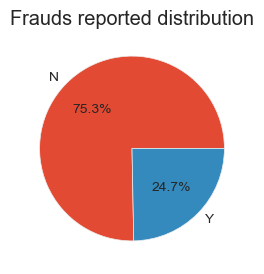

In [189]:
# checking the percentage of fraus reported
fraud_reported_count = data['fraud_reported'].value_counts()
fraud_reported = (fraud_reported_count/len(data))*100

plt.figure(figsize = (3,3))
plt.pie(fraud_reported, labels=fraud_reported_count.index, autopct='%1.1f%%')
plt.title('Frauds reported distribution')
plt.show()

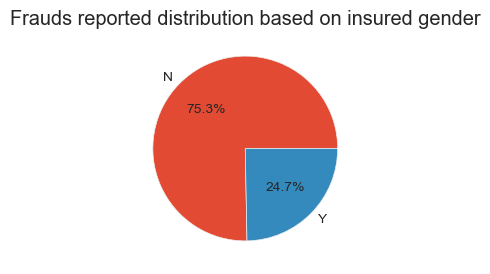

In [190]:
gender_count = data['insured_sex'].value_counts()
gender = (fraud_reported_count/len(data))*100

plt.figure(figsize = (3,3))
plt.pie(fraud_reported, labels=fraud_reported_count.index, autopct='%1.1f%%')
plt.title('Frauds reported distribution based on insured gender')
plt.show()

In [191]:
data['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Name: count, dtype: int64

In [192]:
# imputing null values using mode
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])

In [193]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [194]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [195]:
#missing values
cols_with_na = [cols for cols in data.columns if data[cols].isnull().sum()>1]

In [196]:
for col in cols_with_na:
    print(col, np.round(data[col].isnull().mean(), 4), '% of missing values')

authorities_contacted 0.091 % of missing values
property_damage 0.36 % of missing values
police_report_available 0.343 % of missing values


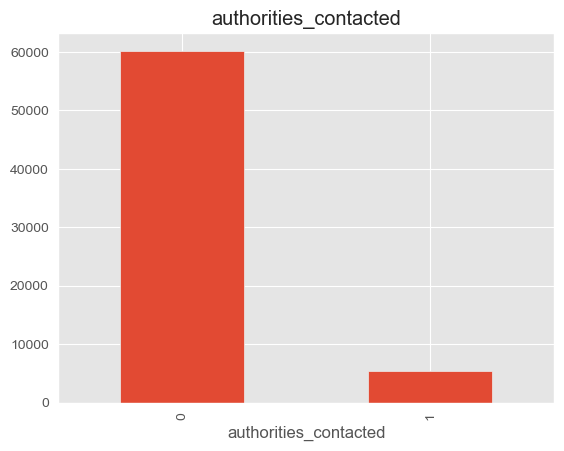

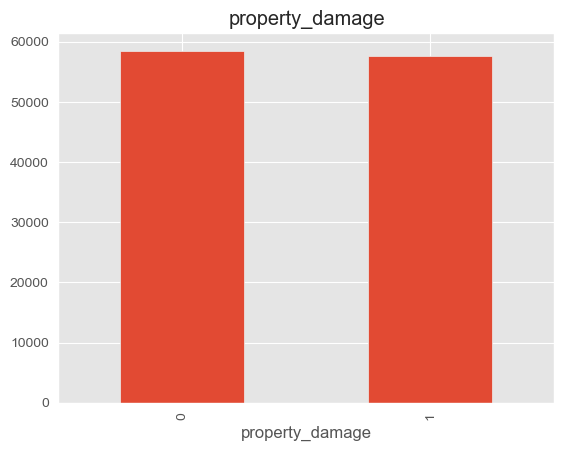

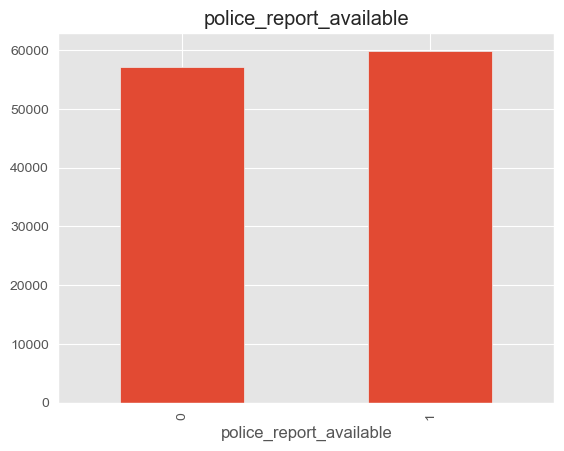

In [197]:
#see if missing value columns have any relationship with dependent variable
for col in cols_with_na:
    data1 = data.copy()
    
    data1[col]=np.where(data[col].isnull(),1,0)
    data1.groupby(col)['total_claim_amount'].median().plot.bar()
    plt.title(col)
    plt.show()

In [198]:
#imputing the missing data
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['authorities_contacted'] = data['authorities_contacted'].fillna(data['authorities_contacted'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [199]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [200]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [201]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','policy_csl']

data.drop(to_drop, inplace = True, axis = 1)

In [202]:
data.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,Police,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [203]:
data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [204]:
data.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510,Y
2,134,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,Police,20,1,NO,0,1,NO,1300,650,4550,N


In [205]:
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [206]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [207]:
cat_df.head()

,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO


In [208]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [209]:
#using get_dummies for categorical variables
cat_df = pd.get_dummies(cat_df, drop_first = True)
cat_df = cat_df.astype(int)

In [210]:
cat_df.head()

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0


In [211]:
# extracting the numerical columns
num_df = X.select_dtypes(include = ['int64'])
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


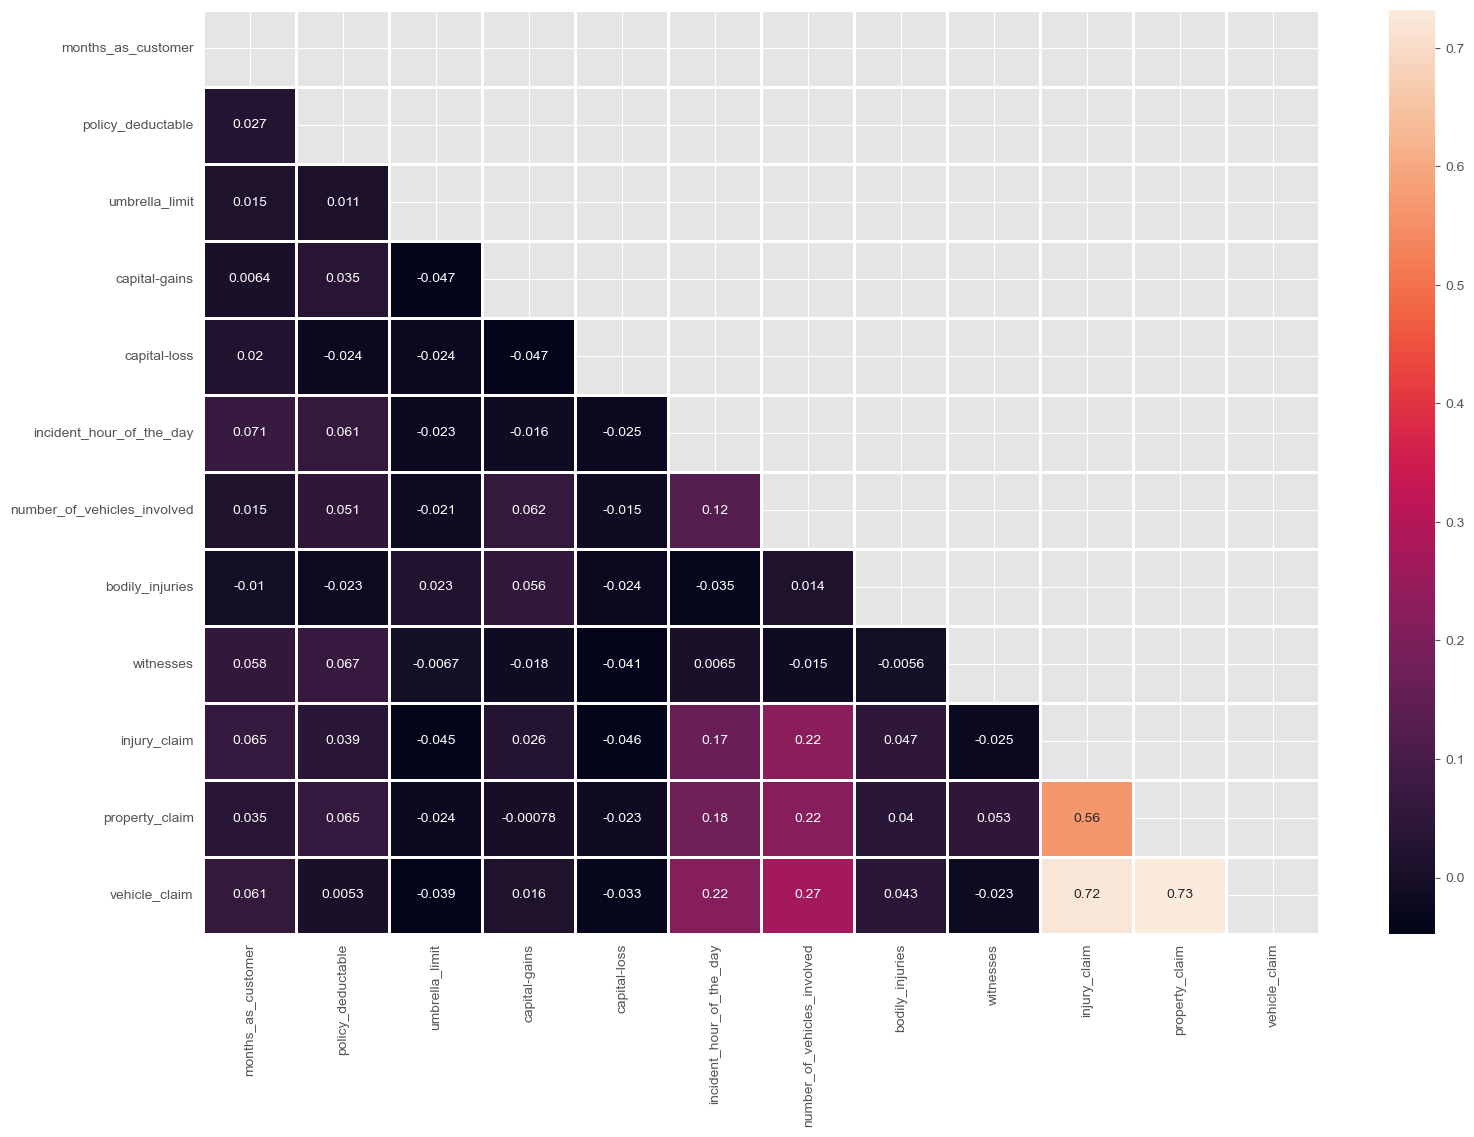

In [212]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = num_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [213]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0


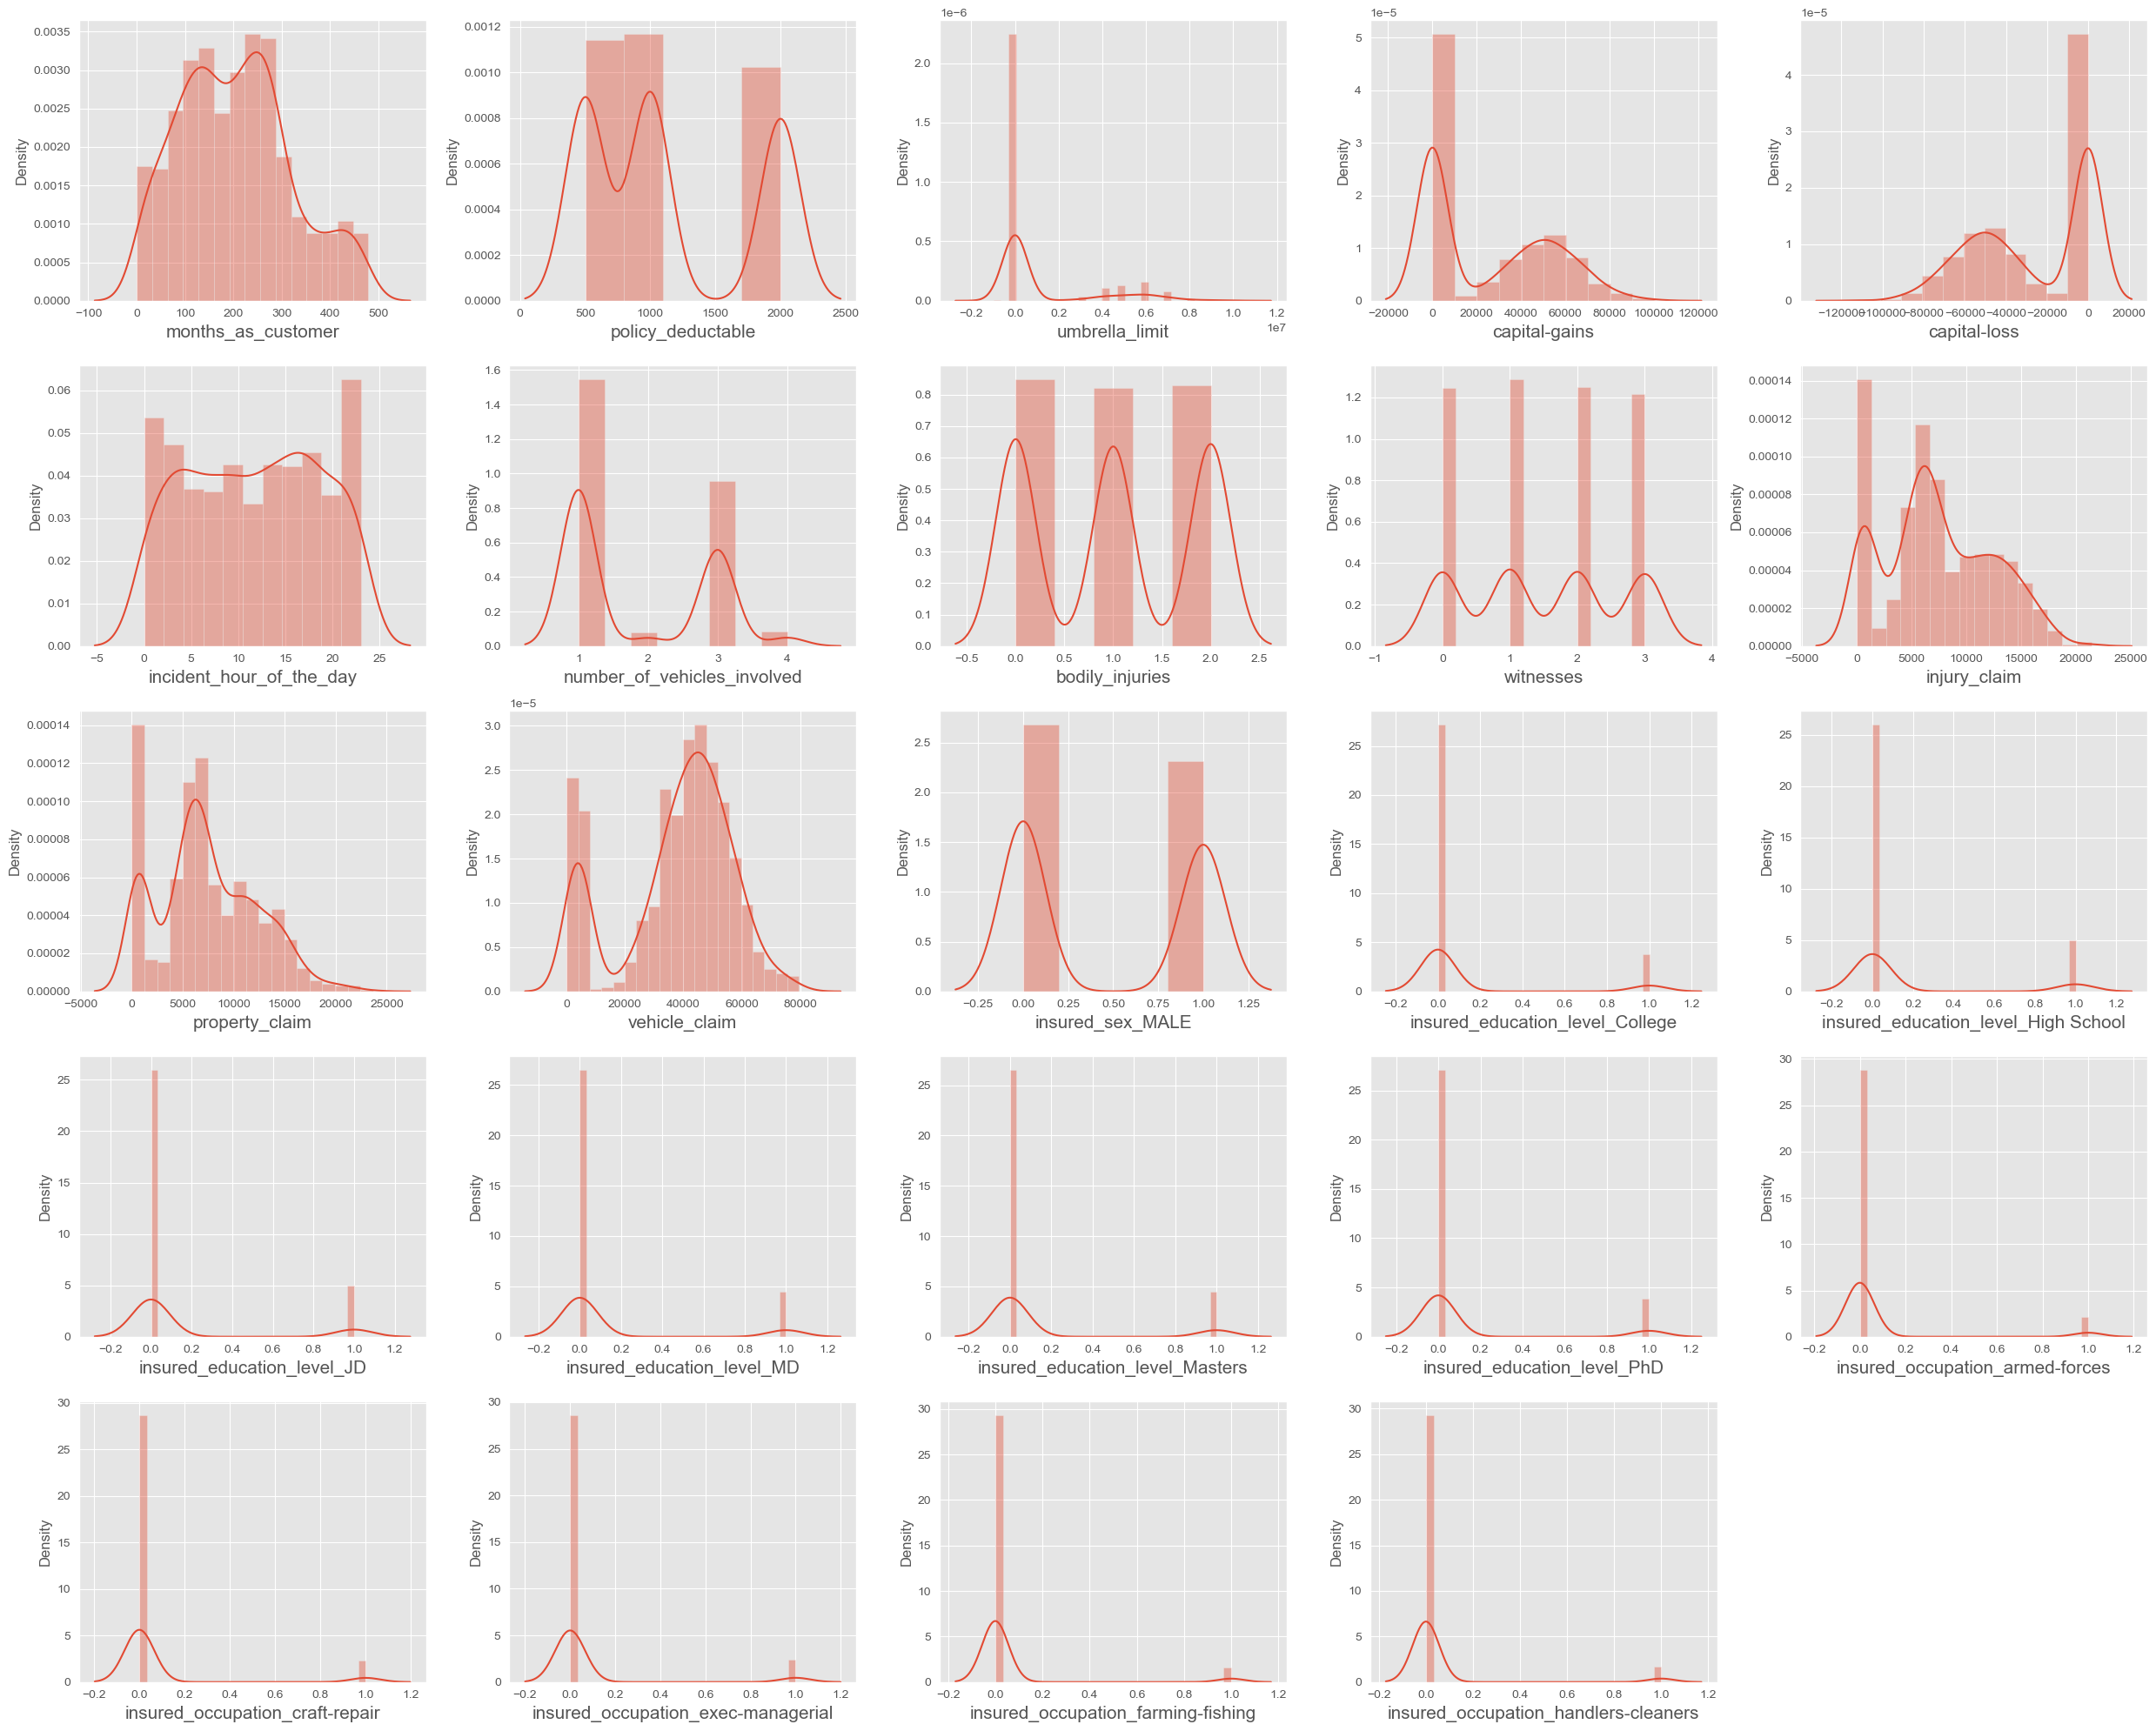

In [214]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later

In [215]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [216]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
541,239,1000,7000000,51400,-6300,22,1,0,2,1660,830,8300,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
356,229,2000,0,65600,0,14,3,1,1,11460,5730,51570,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
151,288,1000,0,0,0,4,3,2,1,10680,5340,32040,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
527,285,1000,0,55100,0,8,1,1,1,300,300,2100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
528,379,500,0,41400,0,14,1,0,1,6330,6330,63300,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [217]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [218]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [219]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
541,0.279540,-0.211311,2.488560,0.928281,0.717294,1.498153,-0.839942,-1.197918,0.443210,-1.173337,-1.366760,-1.583634
356,0.191965,1.422540,-0.486831,1.435797,0.942226,0.341278,1.134843,0.011286,-0.469997,0.823224,-0.341924,0.735957
151,0.708658,-0.211311,-0.486831,-0.908781,0.942226,-1.104816,1.134843,1.220490,-0.469997,0.664314,-0.423493,-0.310995
527,0.682386,-0.211311,-0.486831,1.060521,0.942226,-0.526378,-0.839942,0.011286,-0.469997,-1.450410,-1.477609,-1.916000
528,1.505592,-1.028237,-0.486831,0.570876,0.942226,0.341278,-0.839942,-1.197918,-0.469997,-0.221914,-0.216434,1.364772


In [220]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [221]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [222]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
541,0.279540,-0.211311,2.488560,0.928281,0.717294,1.498153,-0.839942,-1.197918,0.443210,-1.173337,-1.366760,-1.583634,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
356,0.191965,1.422540,-0.486831,1.435797,0.942226,0.341278,1.134843,0.011286,-0.469997,0.823224,-0.341924,0.735957,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
151,0.708658,-0.211311,-0.486831,-0.908781,0.942226,-1.104816,1.134843,1.220490,-0.469997,0.664314,-0.423493,-0.310995,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
527,0.682386,-0.211311,-0.486831,1.060521,0.942226,-0.526378,-0.839942,0.011286,-0.469997,-1.450410,-1.477609,-1.916000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
528,1.505592,-1.028237,-0.486831,0.570876,0.942226,0.341278,-0.839942,-1.197918,-0.469997,-0.221914,-0.216434,1.364772,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


## Model : Support Vector classifier

In [223]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [224]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8373333333333334
Test accuracy of Support Vector Classifier is : 0.78
[[195   0]
 [ 55   0]]
              precision    recall  f1-score   support

           N       0.78      1.00      0.88       195
           Y       0.00      0.00      0.00        55

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.61      0.78      0.68       250



## Decision Tree classifier model

In [225]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [226]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.492
[[101  94]
 [ 33  22]]
              precision    recall  f1-score   support

           N       0.75      0.52      0.61       195
           Y       0.19      0.40      0.26        55

    accuracy                           0.49       250
   macro avg       0.47      0.46      0.44       250
weighted avg       0.63      0.49      0.54       250



In [227]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [228]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.8026666666666668


In [229]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [230]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8053333333333333
Test accuracy of Decision Tree is : 0.836
[[170  25]
 [ 16  39]]
              precision    recall  f1-score   support

           N       0.91      0.87      0.89       195
           Y       0.61      0.71      0.66        55

    accuracy                           0.84       250
   macro avg       0.76      0.79      0.77       250
weighted avg       0.85      0.84      0.84       250



## Model : Random Forest classifier

In [231]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [232]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9653333333333334
Test accuracy of Random Forest is : 0.776
[[164  31]
 [ 25  30]]
              precision    recall  f1-score   support

           N       0.87      0.84      0.85       195
           Y       0.49      0.55      0.52        55

    accuracy                           0.78       250
   macro avg       0.68      0.69      0.69       250
weighted avg       0.79      0.78      0.78       250



## Model : Adaboost classifier

In [233]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=8)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [234]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 120}
0.8026666666666668


In [235]:
# best estimator 

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [236]:
# accuracy_score, confusion_matrix and classification_report

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.8053333333333333
Test accuracy of Ada Boost is : 0.836
[[170  25]
 [ 16  39]]
              precision    recall  f1-score   support

           N       0.91      0.87      0.89       195
           Y       0.61      0.71      0.66        55

    accuracy                           0.84       250
   macro avg       0.76      0.79      0.77       250
weighted avg       0.85      0.84      0.84       250



## Model: Gradient boosting

In [237]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.932
Test Accuracy of Gradient Boosting Classifier is 0.428 

Confusion Matrix :- 
[[ 69 126]
 [ 17  38]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.80      0.35      0.49       195
           Y       0.23      0.69      0.35        55

    accuracy                           0.43       250
   macro avg       0.52      0.52      0.42       250
weighted avg       0.68      0.43      0.46       250



## Model : Stochastic Gradient Boosting (SGB)

In [238]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.9266666666666666
Test Accuracy of Stochastic Gradient Boosting is 0.384 

Confusion Matrix :- 
[[ 48 147]
 [  7  48]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.87      0.25      0.38       195
           Y       0.25      0.87      0.38        55

    accuracy                           0.38       250
   macro avg       0.56      0.56      0.38       250
weighted avg       0.73      0.38      0.38       250



## Model : Extra Trees Classifier

In [239]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.808 

Confusion Matrix :- 
[[180  15]
 [ 33  22]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.85      0.92      0.88       195
           Y       0.59      0.40      0.48        55

    accuracy                           0.81       250
   macro avg       0.72      0.66      0.68       250
weighted avg       0.79      0.81      0.79       250



In [240]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
              ('Extra Trees Classifier', etc)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

In [241]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.94
Test accuracy of Voting Classifier is : 0.764
[[151  44]
 [ 15  40]]
              precision    recall  f1-score   support

           N       0.91      0.77      0.84       195
           Y       0.48      0.73      0.58        55

    accuracy                           0.76       250
   macro avg       0.69      0.75      0.71       250
weighted avg       0.81      0.76      0.78       250



In [242]:
#creating dataframe for models and obtained scores
models = pd.DataFrame({
    'Model' : ['SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Extra Trees', 'Voting Classifier'],
    'Score' : [svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_acc, sgb_acc, etc_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree,0.836
3,Ada Boost,0.836
6,Extra Trees,0.808
0,SVC,0.780
2,Random Forest,0.776
7,Voting Classifier,0.764
4,Gradient Boost,0.428
5,SGB,0.384


## Model Comparisons:
    
Using bar plot, comparing the obtained test accuracies of ML models used

In [243]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Comparison of Models')